In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn

In [2]:
!cp -r /kaggle/input/imageclassificationsport/ /kaggle/working

In [3]:
import tarfile
my_tar = tarfile.open('/kaggle/working/imageclassificationsport/data-z3.tar.xz')
my_tar.extractall('/kaggle/working/imageclassificationsport/data/') # specify which folder to extract to
my_tar.close()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import glob
import os


Analyzujete početnosti v triedach, zobrazte si reprezentanta z triedy

In [6]:
class_name = {}

for filepath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    filename = basename(filepath)
    count = 0
    for path in os.listdir(filepath):
        # check if current path is a file
        if os.path.isfile(os.path.join(filepath, path)):
            count += 1
    class_name[filename] = [count]


In [7]:
class_names = list(class_name.keys())

In [8]:
import pandas as pd
count_df = pd.DataFrame(class_name).transpose()

In [9]:
count_df.columns = ['amount']

count_df.head()

,amount
log rolling,128
billiards,145
rollerblade racing,159
baseball,174
sailboat racing,144


In [10]:
import plotly.express as px

fig = px.bar(count_df, x="amount",title="Amount of classes",template="plotly_dark", height=500)
fig.show()

Analyzujte triedy podľa farebnosti pixelov obrázkov

In [11]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [12]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [13]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [14]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (1, 1))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#2a2c23', '#238f9d', '#a8897b', '#7d5243', '#a7d7dd']


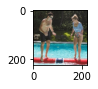

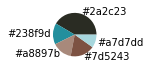

In [15]:
from matplotlib.pyplot import figure
plt.figure(figsize=(1,1))

for dirpath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    count = 0
    for imagepath in glob.iglob(dirpath+'/*'):
        filename = basename(imagepath)
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        modified_image = prep_image(image)
        color_analysis(modified_image)
        break
    break  
            

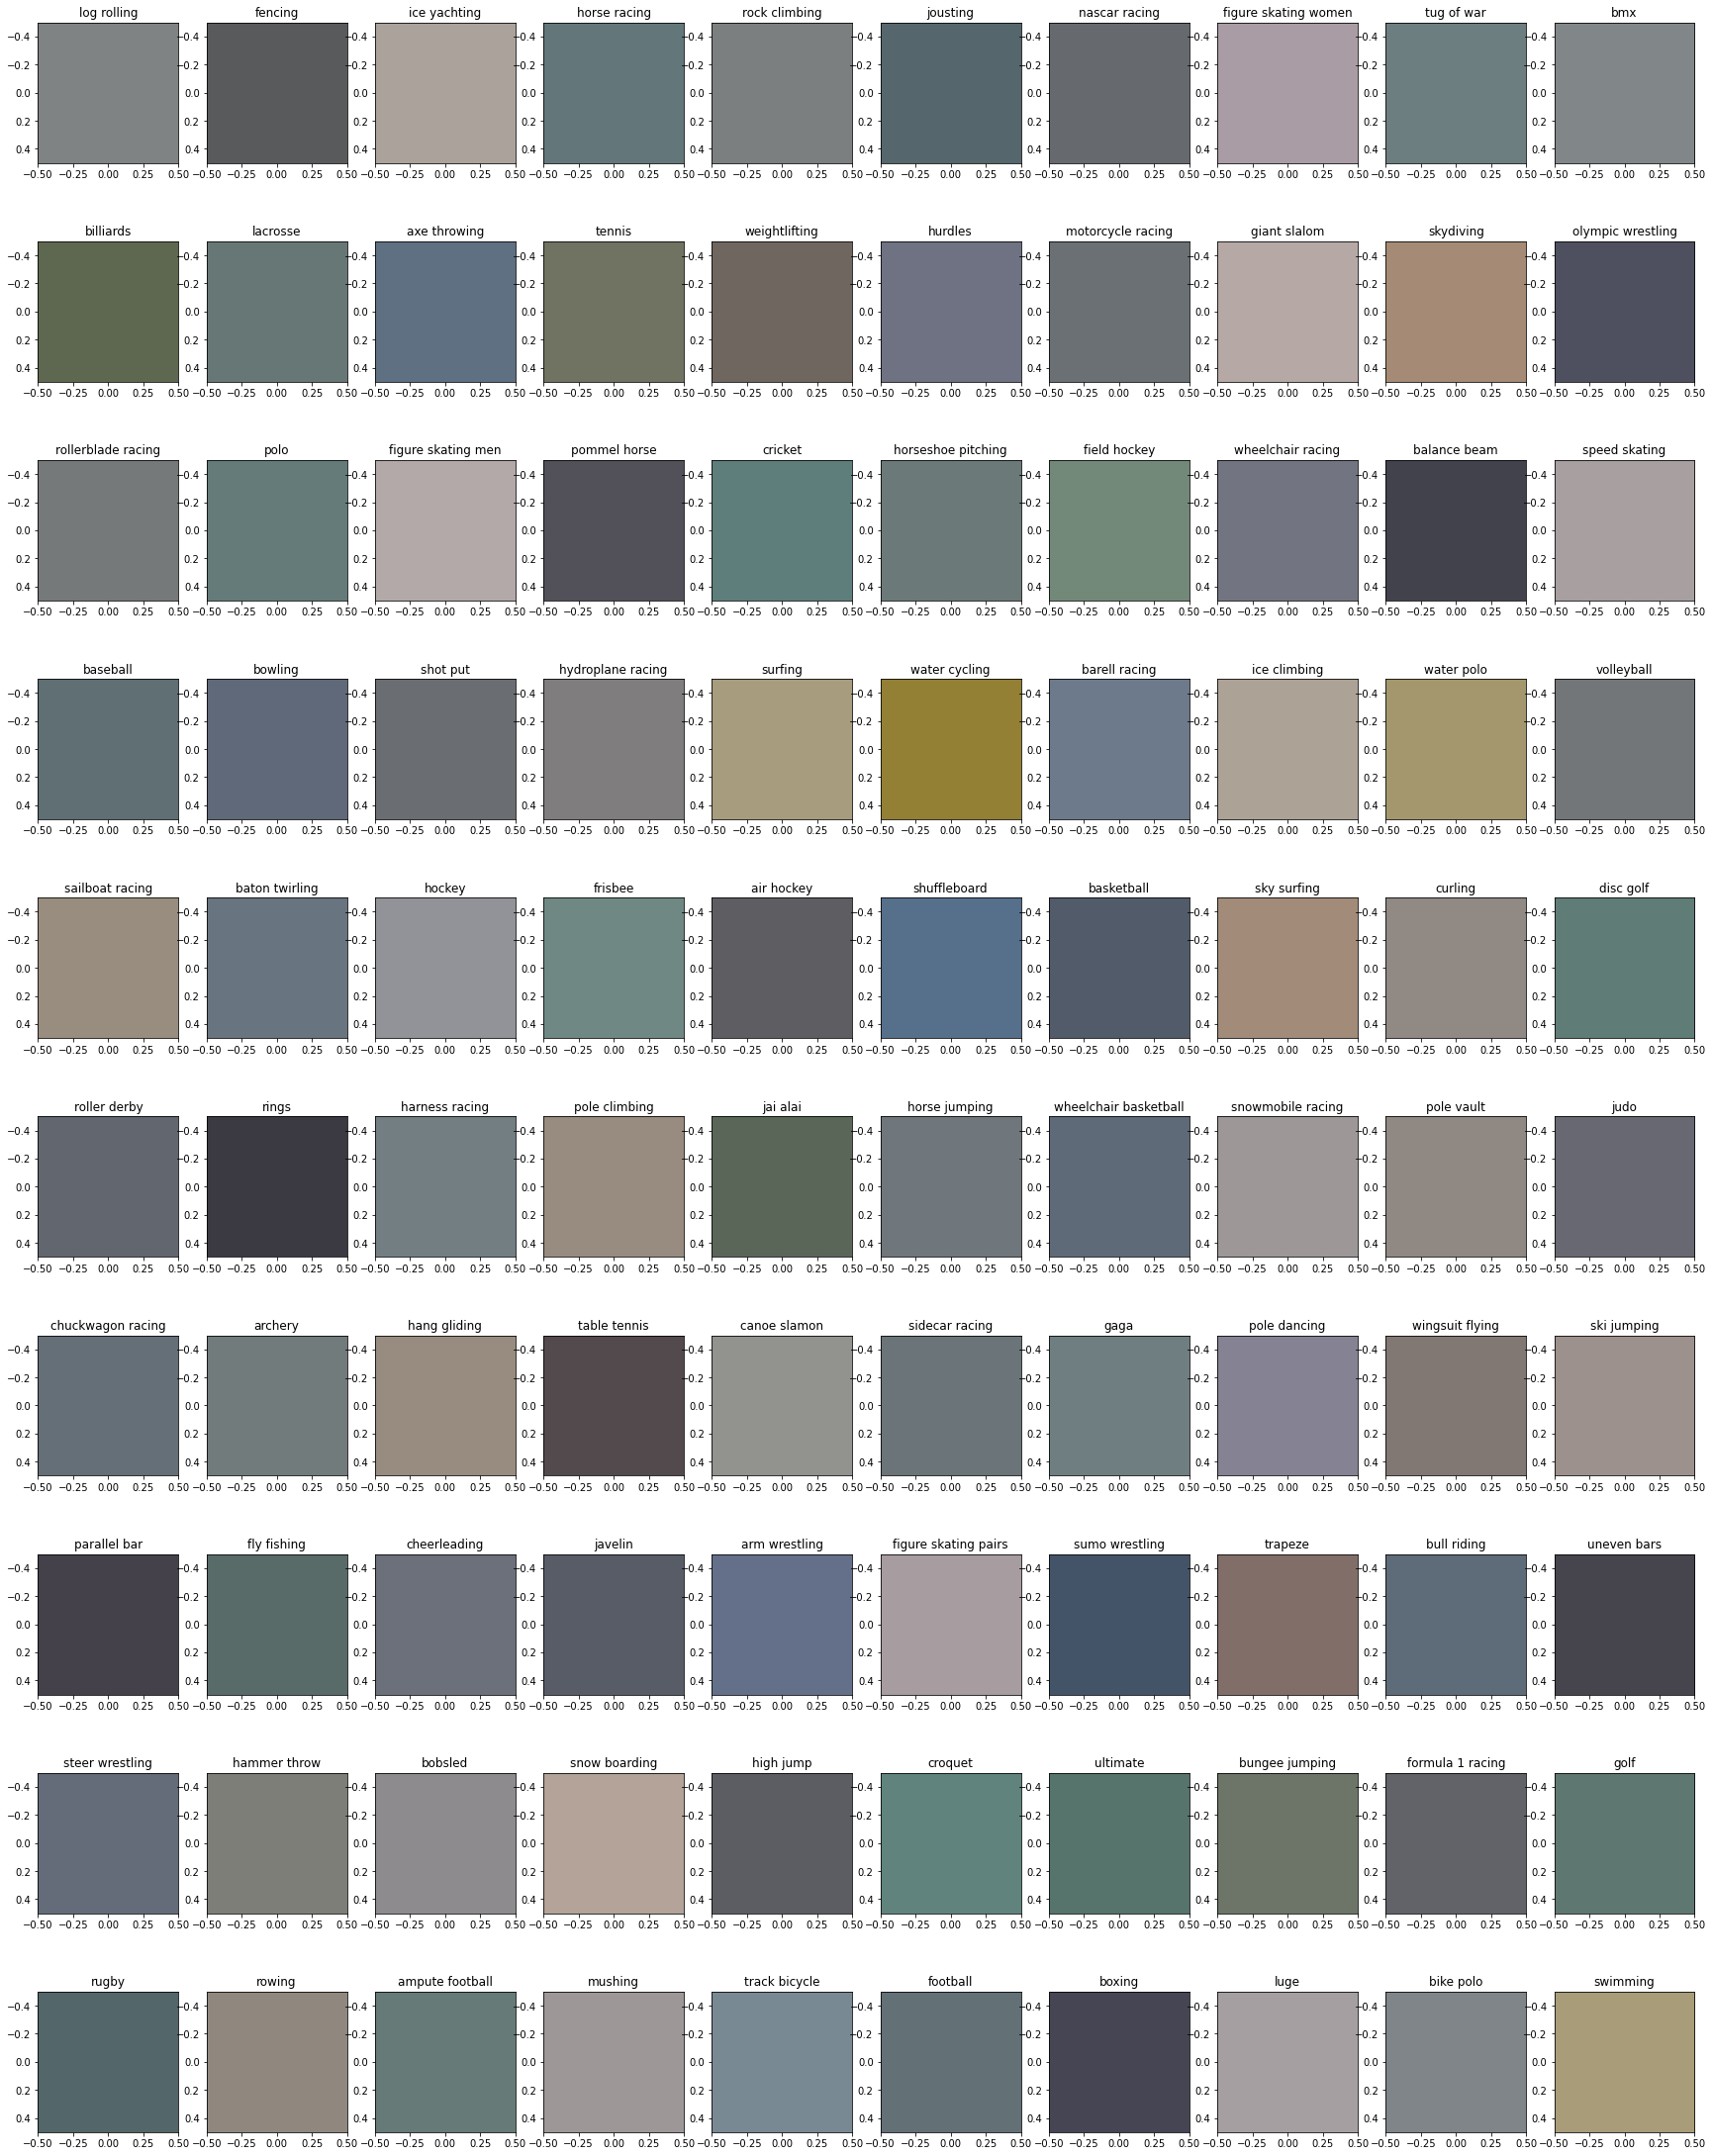

<Figure size 720x720 with 0 Axes>

In [16]:
import cv2
import numpy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure, axis = plt.subplots(nrows=10, ncols=10, figsize=(30,40))
j = 0
plt.figure(figsize = (10, 10))
for (i,dirpath) in enumerate(glob.iglob('/kaggle/working/imageclassificationsport/data/train/*')):
    filename = basename(dirpath)
    colors = []
    for imagepath in glob.iglob(dirpath+'/*'):
        myimg = cv2.imread(imagepath)
        colors.append(myimg)    
    averageIm = np.mean(colors, axis=0)
    averageColor = averageIm.mean(axis=(0,1))
    averageColor = numpy.round(averageColor,0)
    averageColor = [int(a) for a in averageColor]
    axis[i%10,j].imshow([[averageColor]])
    axis[i%10,j].set_title(filename)
    if ((i+1)%10 == 0):
        j+=1
    

Analyzujte triedy podľa predpovedí z ľubovoľného modelu natrénovaného na
probléme ImageNet

Správne vytvorte trénovaciu, validačnú a testovaciu množinu, pripravte si generátor dát (odporúčame aj augmentovať množinu), nezabudnite dáta normalizovať a vhodne im zmeniť veľkosť

In [17]:
import cv2

isExist = os.path.exists('/kaggle/working/compress/')
if not isExist:
    os.makedirs('/kaggle/working/compress/')
    
for dat in glob.iglob('/kaggle/working/imageclassificationsport/data/*'):
    dataname = basename(dat)
    isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/')
    if not isExist:
        os.makedirs('/kaggle/working/compress/'+dataname+'/')
    #print(dataname)
    for path in glob.iglob(dat+'/*'):
        pathname = basename(path)
        isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        if not isExist:
            os.makedirs('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        #print(pathname)
        for imgpath in glob.iglob(path+'/*'):
            love = imgpath
            imgname = basename(imgpath)
            img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
            scale_percent = 20 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            #plt.imshow(resized)
            cv2.imwrite("/kaggle/working/compress/"+dataname+"/"+pathname+"/"+imgname, resized)

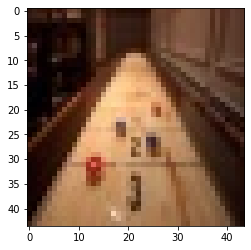

In [18]:
path = '/kaggle/working/compress/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

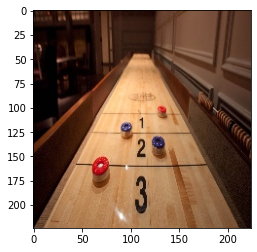

In [19]:
path = '/kaggle/working/imageclassificationsport/data/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
import PIL
from PIL import Image

img = PIL.Image.open("/kaggle/working/compress/test/shuffleboard/5.jpg")
wid, hgt = img.size
print(wid,hgt)

44 44


In [21]:
for dat in glob.iglob('/kaggle/working/compress/test/*'):
    dataname = basename(dat)
    print(dataname)

log rolling
billiards
rollerblade racing
baseball
sailboat racing
roller derby
chuckwagon racing
parallel bar
steer wrestling
rugby
fencing
lacrosse
polo
bowling
baton twirling
rings
archery
fly fishing
hammer throw
rowing
ice yachting
axe throwing
figure skating men
shot put
hockey
harness racing
hang gliding
cheerleading
bobsled
ampute football
horse racing
tennis
pommel horse
hydroplane racing
frisbee
pole climbing
table tennis
javelin
snow boarding
mushing
rock climbing
weightlifting
cricket
surfing
air hockey
jai alai
canoe slamon
arm wrestling
high jump
track bicycle
jousting
hurdles
horseshoe pitching
water cycling
shuffleboard
horse jumping
sidecar racing
figure skating pairs
croquet
football
nascar racing
motorcycle racing
field hockey
barell racing
basketball
wheelchair basketball
gaga
sumo wrestling
ultimate
boxing
figure skating women
giant slalom
wheelchair racing
ice climbing
sky surfing
snowmobile racing
pole dancing
trapeze
bungee jumping
luge
tug of war
skydiving
balan

In [22]:
image_size = (wid, hgt)
batch_size = 64

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/valid",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 13572 files belonging to 100 classes.


2022-12-02 20:55:50.826390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 20:55:50.830402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 20:55:50.831228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 20:55:50.833761: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


Zobrazte si reprezentanta z triedy

2022-12-02 20:55:53.907985: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


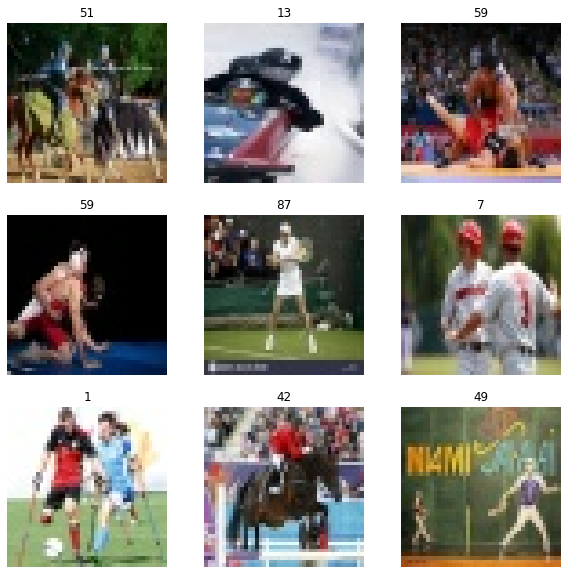

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

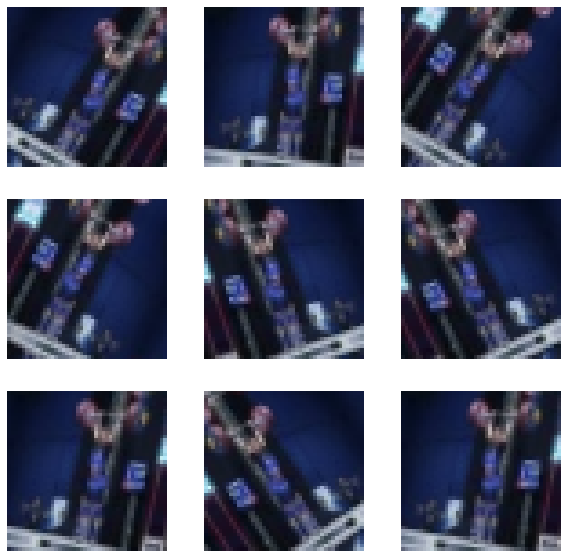

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Navrhnite sieť s aspoň 2 konvolučnými vrstvami. Ak budete sledovať pretrenovanie,
riešte ho regularizáciou. Skúste niekoľko (cielených) konfigurácii hyperparametrov, výsledky zobrazte v tabuľke. Dopracujte sa aspoň ku viditeľnej diagonálena konfúznej matici.

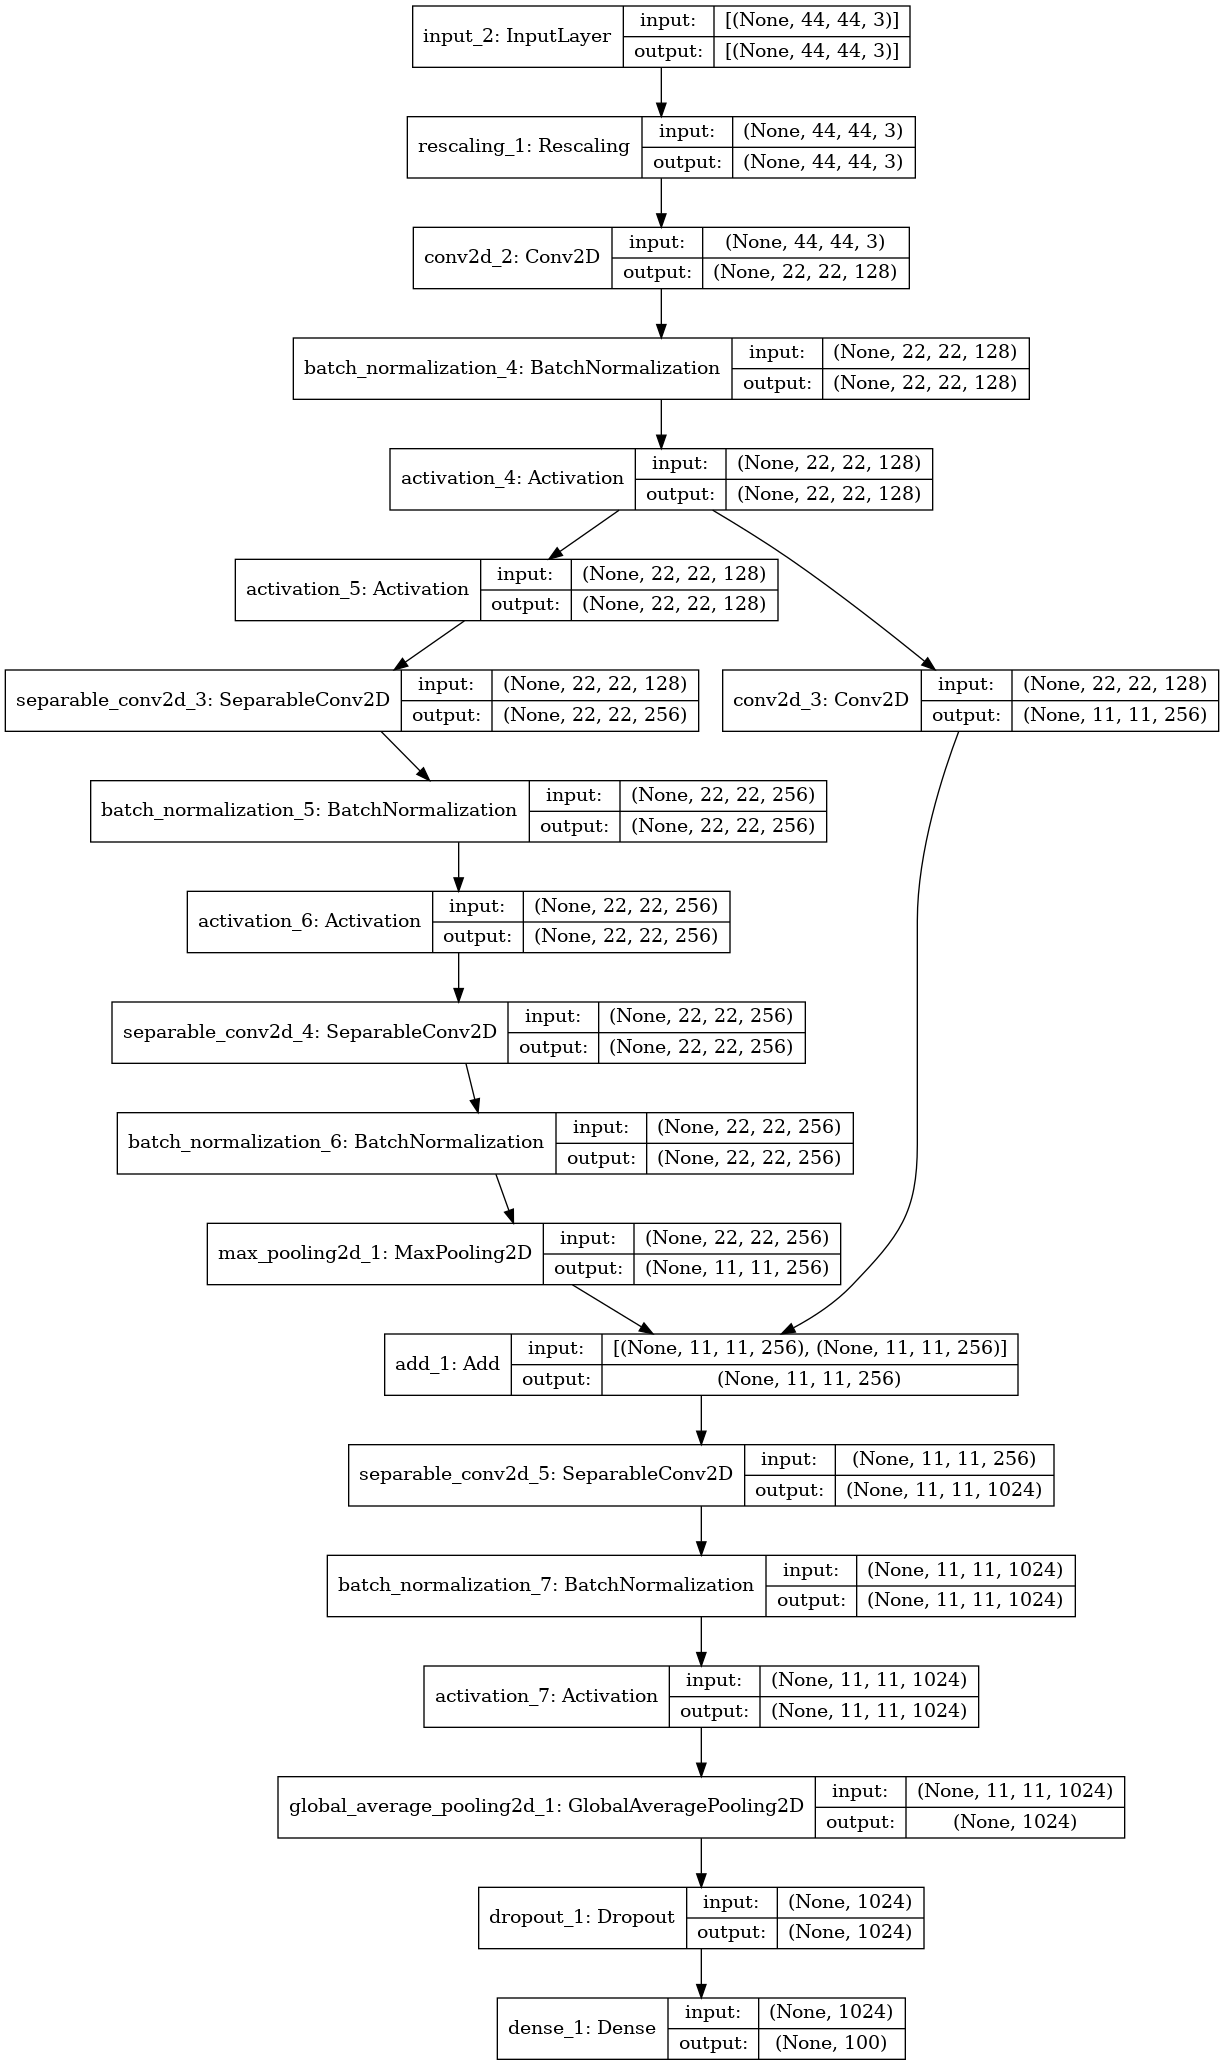

In [35]:
from tensorflow.keras.utils import plot_model

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=100)
keras.utils.plot_model(model, show_shapes=True)
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
#import shutil
#shutil.rmtree('/kaggle/working/logs/')

In [37]:
rm -rf /kaggle/working/logs/

In [38]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(20, 20))
  plt.imshow(cm, interpolation='nearest', cmap='magma')
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    #plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [39]:
from datetime import datetime

# Clear out prior logging data.
#!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

2022-12-02 20:56:29.258171: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-02 20:56:29.258243: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-02 20:56:29.544866: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-02 20:56:29.545032: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [40]:
def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

In [41]:
import itertools
import io

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(val_ds)
  test_pred = np.argmax(test_pred_raw, axis=1)
  test_labels = np.concatenate([y for x, y in val_ds], axis=0)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [42]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.keras"),
    tf.keras.callbacks.TensorBoard(log_dir='/kaggle/working/logs'),
    cm_callback
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

2022-12-02 20:56:29.701502: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-02 20:56:29.701543: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-02 20:56:29.938888: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-02 20:56:29.939059: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 1/20


2022-12-02 20:56:31.764611: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/213 [..............................] - ETA: 26:18 - loss: 4.8944 - accuracy: 0.0156

2022-12-02 20:56:37.657687: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-02 20:56:37.657731: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/213 [..............................] - ETA: 1:33 - loss: 4.8125 - accuracy: 0.0078 

2022-12-02 20:56:38.086754: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-02 20:56:38.087394: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-02 20:56:38.223763: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 222 callback api events and 219 activity events. 
2022-12-02 20:56:38.232129: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-02 20:56:38.252421: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38

2022-12-02 20:56:38.261873: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38/87e819f74f8a.trace.json.gz
2022-12-02 20:56:38.283841: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Cre

213/213 [==============================] - 13s 27ms/step - loss: 3.9452 - accuracy: 0.0875 - val_loss: 4.6782 - val_accuracy: 0.0120


Cleanup called...


Epoch 2/20
213/213 [==============================] - 5s 24ms/step - loss: 3.4010 - accuracy: 0.1701 - val_loss: 5.4413 - val_accuracy: 0.0360


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 3/20
213/213 [==============================] - 6s 27ms/step - loss: 3.1494 - accuracy: 0.2149 - val_loss: 3.3105 - val_accuracy: 0.1740


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 4/20
213/213 [==============================] - 5s 23ms/step - loss: 2.9445 - accuracy: 0.2569 - val_loss: 3.3464 - val_accuracy: 0.2140


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 5/20
213/213 [==============================] - 5s 23ms/step - loss: 2.8007 - accuracy: 0.2886 - val_loss: 2.9856 - val_accuracy: 0.2580


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 6/20
213/213 [==============================] - 5s 24ms/step - loss: 2.6904 - accuracy: 0.3148 - val_loss: 2.6371 - val_accuracy: 0.3200


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 7/20
213/213 [==============================] - 6s 27ms/step - loss: 2.5683 - accuracy: 0.3398 - val_loss: 2.6933 - val_accuracy: 0.3280


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 8/20
213/213 [==============================] - 5s 24ms/step - loss: 2.4740 - accuracy: 0.3560 - val_loss: 2.6253 - val_accuracy: 0.3420


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 9/20
213/213 [==============================] - 5s 24ms/step - loss: 2.3999 - accuracy: 0.3771 - val_loss: 2.3274 - val_accuracy: 0.3940


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 10/20
213/213 [==============================] - 6s 26ms/step - loss: 2.3149 - accuracy: 0.3892 - val_loss: 3.0517 - val_accuracy: 0.2780


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 11/20
213/213 [==============================] - 5s 23ms/step - loss: 2.2627 - accuracy: 0.4050 - val_loss: 3.0262 - val_accuracy: 0.2700


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 12/20
213/213 [==============================] - 5s 24ms/step - loss: 2.1919 - accuracy: 0.4212 - val_loss: 2.9690 - val_accuracy: 0.2900


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 13/20
213/213 [==============================] - 5s 24ms/step - loss: 2.1403 - accuracy: 0.4298 - val_loss: 2.6167 - val_accuracy: 0.3560


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 14/20
213/213 [==============================] - 6s 26ms/step - loss: 2.0846 - accuracy: 0.4480 - val_loss: 2.6978 - val_accuracy: 0.3640


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 15/20
213/213 [==============================] - 5s 23ms/step - loss: 2.0304 - accuracy: 0.4588 - val_loss: 2.3584 - val_accuracy: 0.3780


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 16/20
213/213 [==============================] - 5s 25ms/step - loss: 1.9657 - accuracy: 0.4765 - val_loss: 2.9467 - val_accuracy: 0.3420


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 17/20
213/213 [==============================] - 5s 24ms/step - loss: 1.9343 - accuracy: 0.4789 - val_loss: 3.2010 - val_accuracy: 0.3060


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 18/20
213/213 [==============================] - 5s 24ms/step - loss: 1.8798 - accuracy: 0.4948 - val_loss: 2.3968 - val_accuracy: 0.4060


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 19/20
213/213 [==============================] - 5s 23ms/step - loss: 1.8494 - accuracy: 0.5064 - val_loss: 2.2459 - val_accuracy: 0.4400


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 20/20
213/213 [==============================] - 5s 23ms/step - loss: 1.8103 - accuracy: 0.5097 - val_loss: 2.2476 - val_accuracy: 0.4340


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


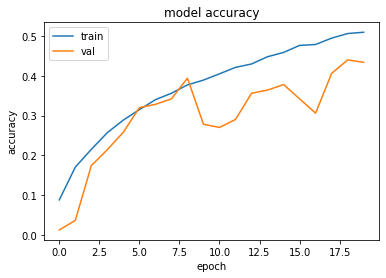

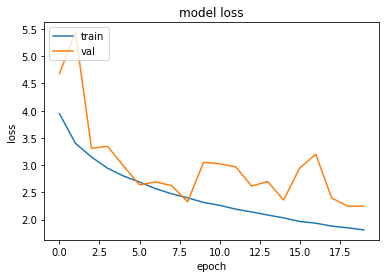

In [43]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
import tensorflow as tf

%load_ext tensorboard

In [45]:
import os

# folder path
dir_path = '/kaggle/working/logs/'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    print(path)

validation
train
image


In [46]:
#tensorboard --logdir /kaggle/working/logs/train --bind_all

In [47]:
!zip -r file.zip /kaggle/working/logs

  adding: kaggle/working/logs/ (stored 0%)
  adding: kaggle/working/logs/validation/ (stored 0%)
  adding: kaggle/working/logs/validation/events.out.tfevents.1670014603.87e819f74f8a.23.4.v2 (deflated 76%)
  adding: kaggle/working/logs/train/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38/87e819f74f8a.trace.json.gz (deflated 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38/87e819f74f8a.tensorflow_stats.pb (deflated 75%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38/87e819f74f8a.overview_page.pb (deflated 63%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38/87e819f74f8a.xplane.pb (deflated 75%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_02_20_56_38/87e819f

In [48]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip